In [4]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

import dabl

In [18]:
### Features som inte används vid träning
def remove_features(df_,remove_mer=[]):
    # df = df_.copy()
    #remove_mer=['h5_perf','h5_auto','h4_perf','h4_auto', 'h3_perf', 'h2_perf']
    df = df_.drop(['avd','startnr','vodds','podds','bins','h1_dat','h2_dat','h3_dat','h4_dat','h5_dat'],axis=1) #
    if remove_mer:
        df = df.drop(remove_mer,axis=1)
    
    # df=check_unique(df.copy())
    # df=check_corr(df.copy())
    return df

## byt ut alla NaN till text för cat_features
def replace_NaN(X_train,X_test=None, cat_features=[]):
    # print('cat_features',cat_features)
    X_train[cat_features]=X_train[cat_features].fillna('missing')
    if X_test is not None:  ## om X_test är med
        X_test[cat_features]=X_test[cat_features].fillnal('missing')    ### byt ut None-värden till texten 'None

    return X_train,X_test

def split_data(df_,train_from_proc=0,test_proc=0.25):
    # train_from_proc = percentage where to start both train and test
    # test_proc = how much of the data is test
    df=df_.copy()
    alla_datum = df.datum.unique()
    train_from_datum = alla_datum[ int(len(alla_datum)*train_from_proc)]
    print(train_from_datum)
    X_test=None
    y_test=None
    test_from_datum=alla_datum[-1]
    if test_proc:
        selected_data = alla_datum[ alla_datum >= train_from_datum ]
        test_from_datum = selected_data[ int(len(selected_data)*(1-test_proc)) ]
        print(test_from_datum)
        X_test  = df[df.datum >= test_from_datum]
        y_test  = (X_test.plac==1)*1
        X_test  = X_test.drop('plac',axis=1)
        
    
    X_train = df[(df.datum >= train_from_datum) & (df.datum < test_from_datum) ]
    y_train = (X_train.plac==1)*1
    
    return X_train.drop('plac', axis=1), X_test, y_train, y_test


In [35]:
dforg = pd.read_csv('..//..//all_data.csv')    
X_train, X_test, y_train, y_test = split_data(dforg,train_from_proc=0.3) 
X_train=remove_features(X_train)
X_test=remove_features(X_test)
y=(dforg.plac == 1) * 1
# X.columns

2017-02-04
2020-05-17


In [36]:
sc = dabl.AnyClassifier(n_jobs=-1).fit(X_train,y_train)
print('Accuracy', sc.score(X_test,y_test))

best classifier:  LogisticRegression(C=10, multi_class='multinomial')
best score: 0.553
Accuracy 0.9100378787878788


C:\Users\peter\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from dabl import plot
import matplotlib.pyplot as plt
X=remove_features(dforg)
X.plac=(X.plac==1) * 1
plot(X, 'plac')

C:\Users\peter\anaconda3\lib\site-packages\dabl\plot\supervised.py:546: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."


Target looks like classification
Showing only top 10 of 42 continuous features


C:\Users\peter\anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 11 outliers in column streck.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\peter\anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 116 outliers in column h1_perf.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\peter\anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 135 outliers in column kr.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\peter\anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 107 outliers in column h2_perf.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\peter\anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 89 outliers in column h3_perf.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\peter\anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 102 outliers in column h1_odds.
  warn("Dropped {} outliers in co

Linear Discriminant Analysis training set score: 0.615


C:\Users\peter\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\peter\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\peter\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\peter\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\peter\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\peter\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


[[<Figure size 2000x400 with 10 Axes>,
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 640x480 with 1 Axes>],
 None]

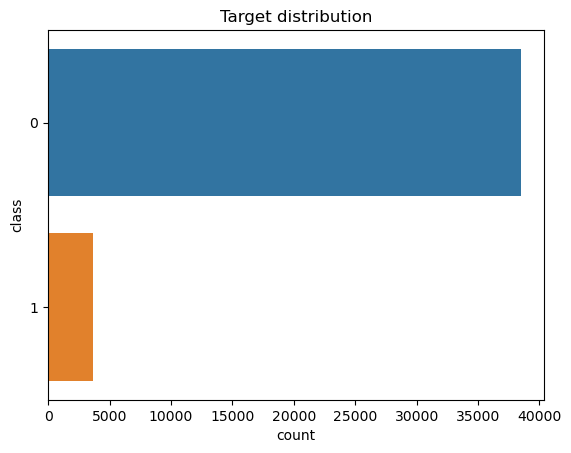

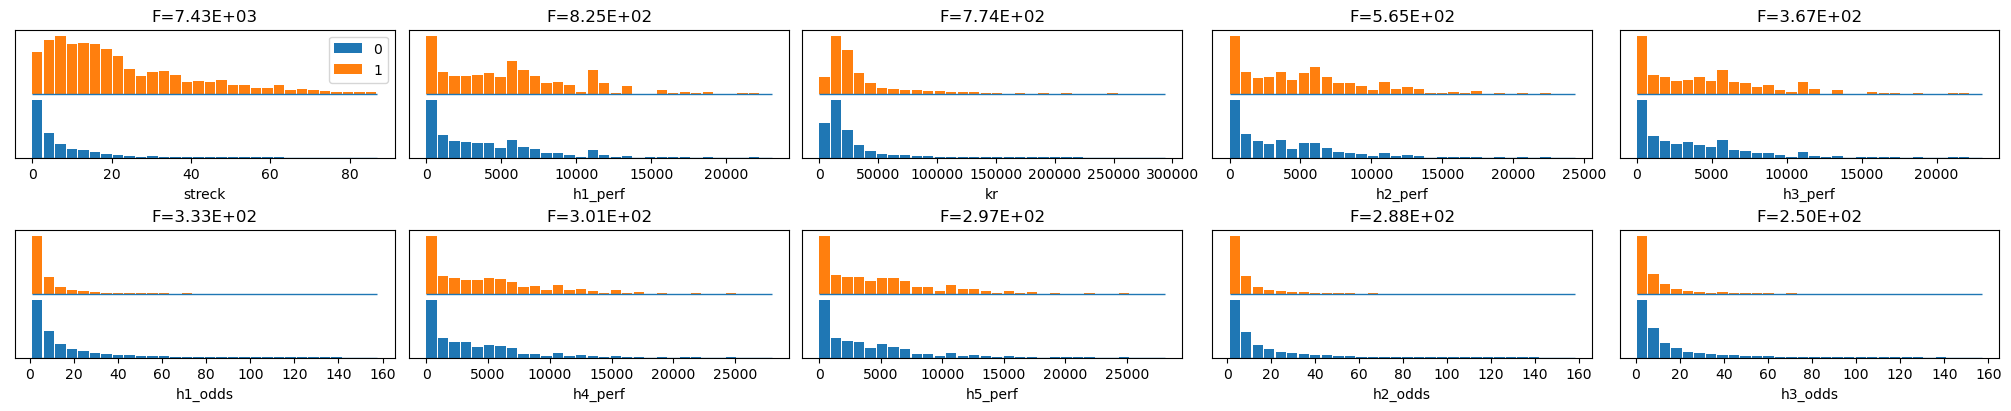

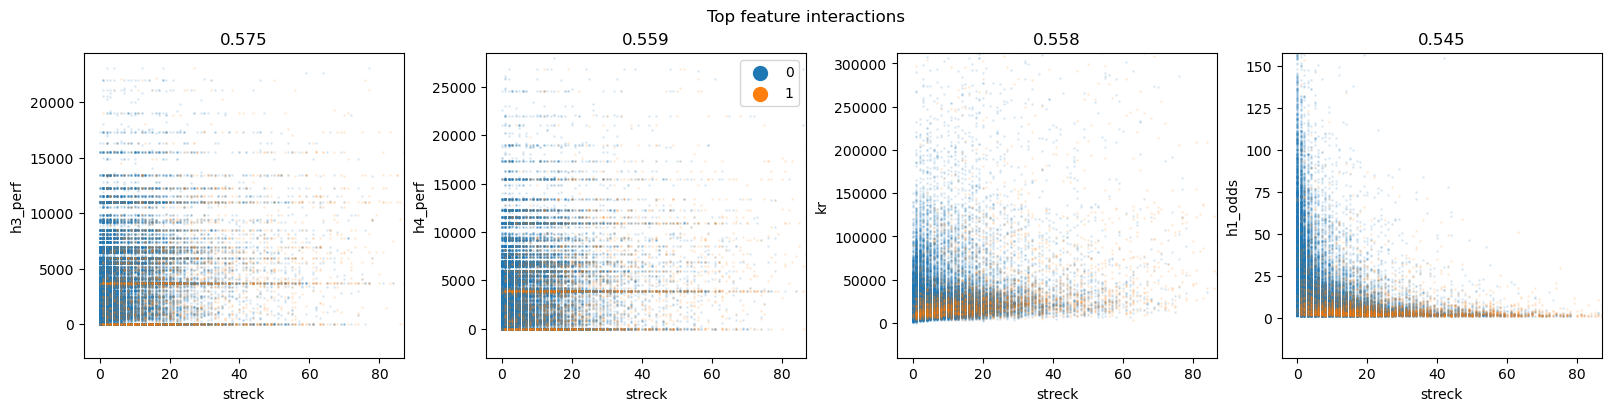

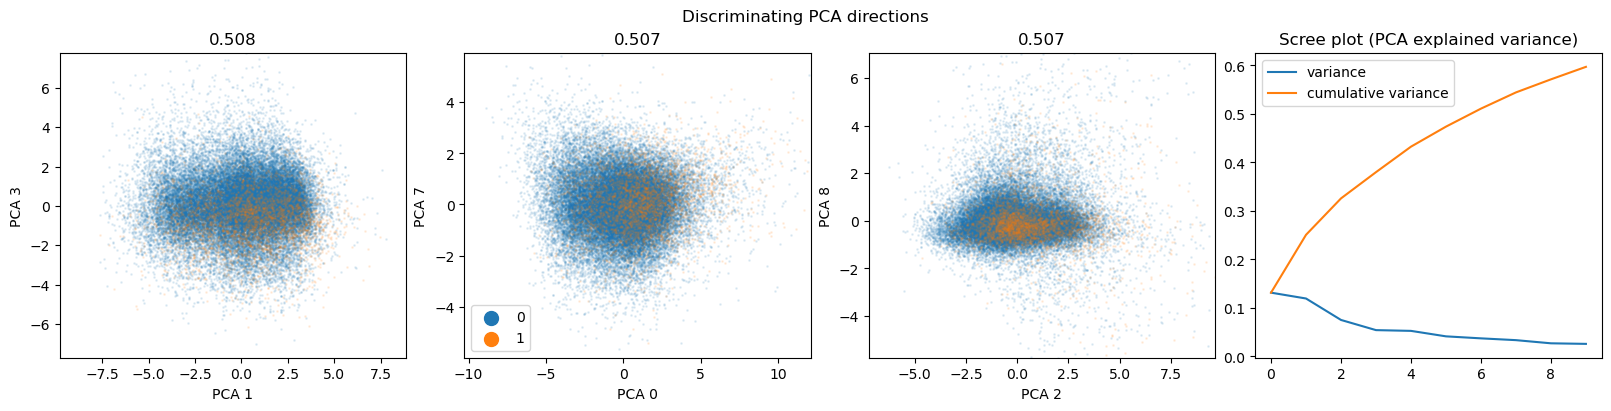

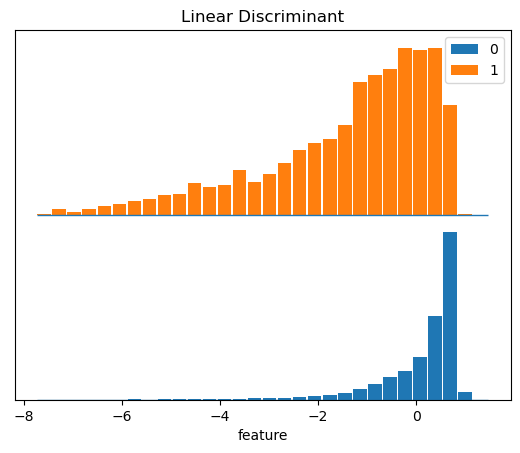

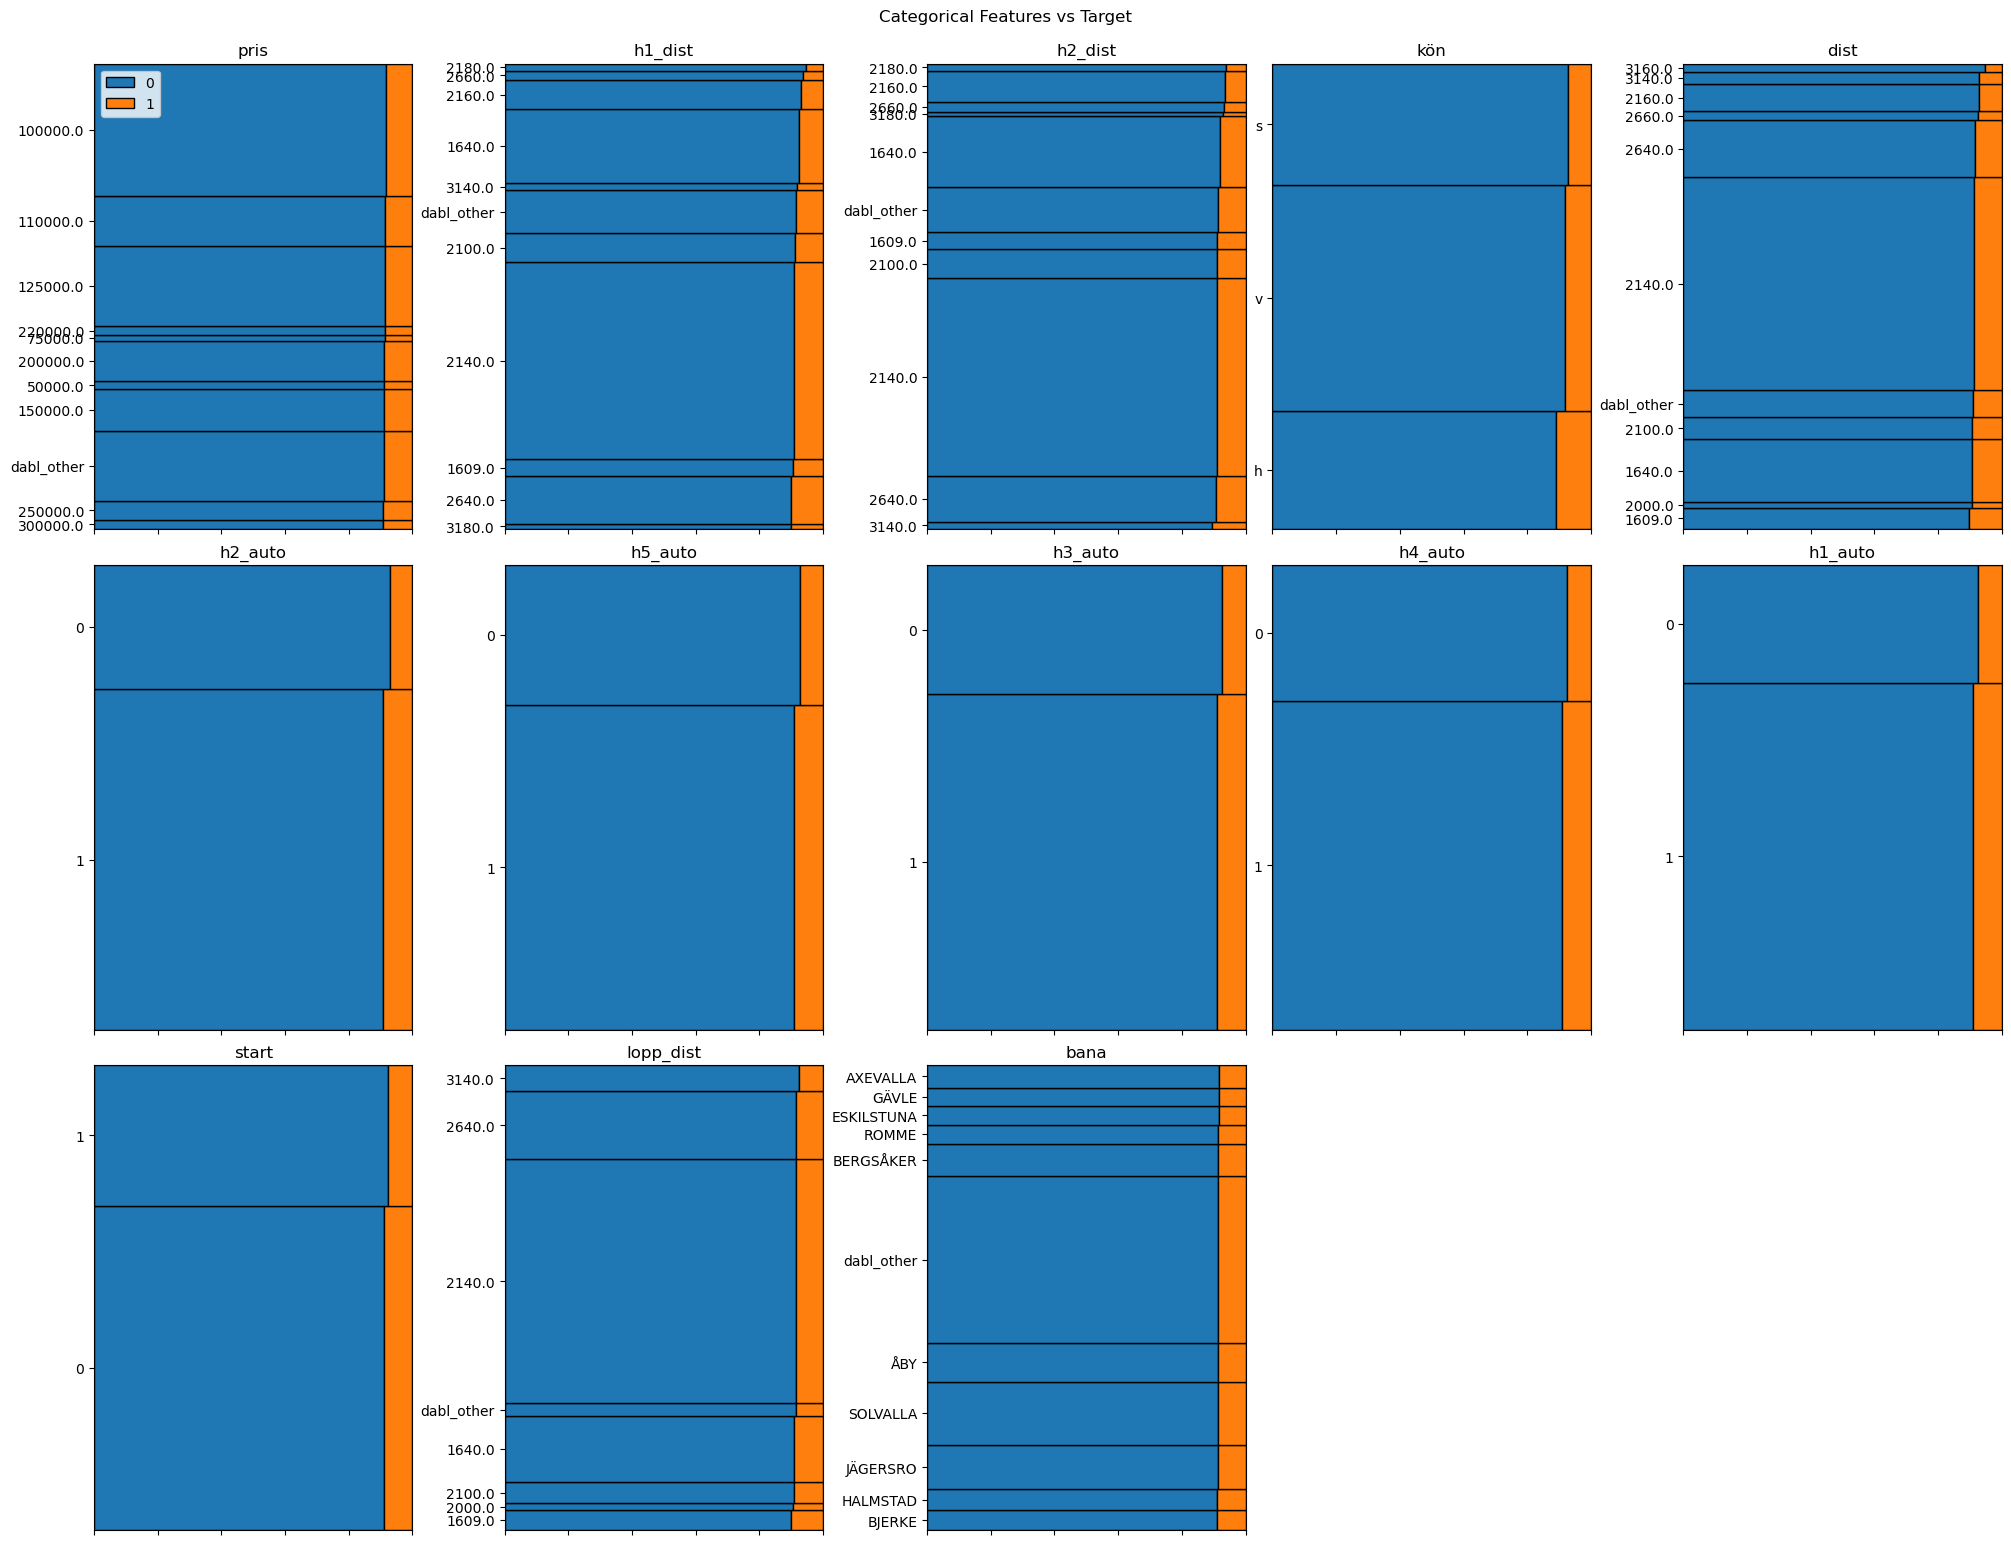

In [32]:
plt.show()